In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Import data as DataFrame
reviews = pd.read_csv('/Users/dwalkerpage/Documents/Data_Science/Springboard/Projects/springboard/Capstone_Projects/Capstone_Project_1/Capstone_Project_1_Data/restaurant_reviews_final.csv')

In [6]:
reviews.head()

,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
3,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...
4,L0aSDVHNXCl6sY4cfZQ-5Q,1.0,"If I could give this place zero stars, I would..."


## Question: What is the total number of each star rating in the data set? ##

In [84]:
# Count total number of each star rating
star_cts = reviews.stars.value_counts()
star_cts

5.0    1589831
4.0    1054999
3.0     538961
1.0     481143
2.0     378515
Name: stars, dtype: int64

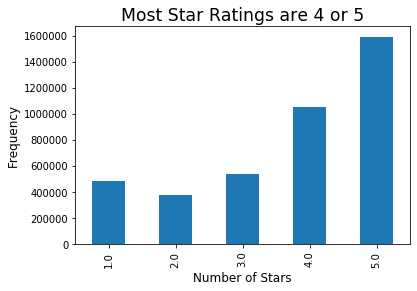

In [83]:
# Plot total number/frequency of each star rating
_ = star_cts.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings are 4 or 5', fontsize='xx-large')

plt.show()

## Question: What are the percentages of each star rating out of all ratings? ##

In [104]:
# Percentage of 1 star reviews
print('Approximately {}% of the star ratings are 1 star.'.format(round((star_cts.loc[1.0] / len(reviews)) * 100, 2)))

# Percentage of 2 star reviews
print('Approximately {}% of the star ratings are 2 stars.'.format(round((star_cts.loc[2.0] / len(reviews)) * 100, 2)))

# Percentage of 3 star reviews
print('Approximately {}% of the star ratings are 3 stars.'.format(round((star_cts.loc[3.0] / len(reviews)) * 100, 2)))

# Percentage of 4 star reviews
print('Approximately {}% of the star ratings are 4 stars.'.format(round((star_cts.loc[4.0] / len(reviews)) * 100, 2)))

# Percentage of 5 star reviews
print('Approximately {}% of the star ratings are 5 stars.'.format(round((star_cts.loc[5.0] / len(reviews)) * 100, 2)))

Approximately 11.9% of the star ratings are 1 star.
Approximately 9.36% of the star ratings are 2 stars.
Approximately 13.33% of the star ratings are 3 stars.
Approximately 26.09% of the star ratings are 4 stars.
Approximately 39.32% of the star ratings are 5 stars.


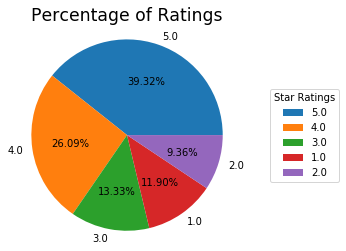

In [134]:
# Plot of percentage of ratings for each rating
_ = star_cts.plot.pie(autopct='%1.2f%%', radius=1.1)
_ = plt.ylabel('')
_ = plt.title('Percentage of Ratings', fontsize='xx-large')
_ = plt.legend(title='Star Ratings',
               loc='center right',
               bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

## Question: What is the average star rating for each restaurant? ##

In [43]:
# Group review data by business_id and calculate mean star rating for each restaurant
df = reviews.groupby(['business_id']).mean()

In [48]:
df.head()

,stars
business_id,
--1UhMGODdWsrMastO9DZw,4.076923
--6MefnULPED_I942VcFNA,3.173913
--9e1ONYQuAa-CB_Rrw7Tw,4.125680
--DaPTJW3-tB1vP-PfdTEg,3.714286
--FBCX-N37CMYDfs790Bnw,3.746479


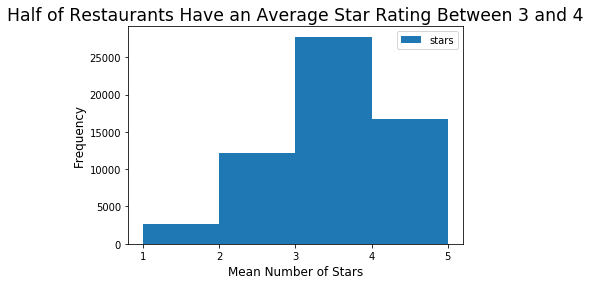

In [135]:
# Plot histogram of frequency of mean star rating for each restaurant
_ = df.plot.hist(bins=[1, 2, 3, 4, 5])
_ = plt.xticks(ticks=[1, 2, 3, 4, 5])
_ = plt.xlabel('Mean Number of Stars', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Half of Restaurants Have an Average Star Rating Between 3 and 4', fontsize='xx-large')

plt.show()

In [77]:
# Percentage of restaurants whose mean star rating is between 1 and 2
print('The percentage of restaurants whose mean star rating is between 1 and 2 is approximately: {}%'
      .format(round((len(df[(df['stars'] > 1) & (df['stars'] <= 2)]) / len(df)) * 100, 2)))

# Percentage of restaurants whose mean star rating is between 2 and 3
print('The percentage of restaurants whose mean star rating is between 2 and 3 is approximately: {}%'
      .format(round((len(df[(df['stars'] > 2) & (df['stars'] <= 3)]) / len(df)) * 100, 2)))

# Percentage of restaurants whose mean star rating is between 3 and 4
print('The percentage of restaurants whose mean star rating is between 3 and 4 is approximately: {}%'
      .format(round((len(df[(df['stars'] > 3) & (df['stars'] <= 4)]) / len(df)) * 100, 2)))

# Percentage of restaurants whose mean star rating is between 4 and 5
print('The percentage of restaurants whose mean star rating is between 4 and 5 is approximately: {}%'
      .format(round((len(df[(df['stars'] > 4) & (df['stars'] <= 5)]) / len(df)) * 100, 2)))

The percentage of restaurants whose mean star rating is between 1 and 2 is approximately: 5.65%
The percentage of restaurants whose mean star rating is between 2 and 3 is approximately: 22.42%
The percentage of restaurants whose mean star rating is between 3 and 4 is approximately: 46.86%
The percentage of restaurants whose mean star rating is between 4 and 5 is approximately: 24.56%


Approximately half of all restaurants have a mean star rating between 3 and 4.

In [90]:
# Compute descriptive statistics of mean star ratings
df.describe()

,stars
count,59287.000000
mean,3.444693
std,0.797605
min,1.000000
25%,2.984791
50%,3.533333
75%,4.000000
max,5.000000


## Question: How many reviews has each restaurant received? ##

In [85]:
# Count number of reviews per restaurant
reviews_per_rest = reviews['business_id'].value_counts()
reviews_per_rest

RESDUcs7fIiihp38-d6_6g    8521
4JNXUYY8wbaaDmk3BPzlWw    8516
K7lWdNUhCbcnEvI0NhGewg    6867
f4x1YBxkLrZg652xt2KR5g    5821
cYwJA2A6I12KNkm2rtXd5g    5537
DkYS3arLOhA8si5uUEmHOw    5182
2weQS-RnoOBhb1KsHKyoSQ    4509
5LNZ67Yw9RD6nf4_UhXOjw    4509
iCQpiavjjPzJ5_3gPD5Ebg    4332
AV6weBrZFFBfRGCbcRGO4g    4185
KskYqH1Bi7Z_61pH6Om8pg    4119
El4FC8jcawUVgw_0EIcbaQ    4067
rcaPajgKOJC2vo_l3xa42A    4011
eoHdUeQDNgQ6WYEnP2aiRw    3997
OETh78qcgDltvHULowwhJg    3624
hihud--QRriCYZw1zZvW4g    3516
7sPNbCx7vGAaH7SbNPZ6oA    3488
g8OnV26ywJlZpezdBnOWUQ    3360
3kdSl5mo9dWC4clrQjEDGg    3336
XZbuPXdyA0ZtTu3AzqtQhg    3335
YJ8ljUhLsz6CtT_2ORNFmg    3293
RwMLuOkImBIqqYj4SSKSPg    3240
P7pxQFqr7yBKMMI2J51udw    3215
eAc9Vd6loOgRQolMXQt6FA    3174
yfxDa8RFOvJPQh0rNtakHA    3097
G-5kEa6E6PD5fkBRuA7k9Q    2971
fL-b760btOaGa85OJ9ut3w    2933
ujHiaprwCQ5ewziu0Vi9rw    2921
QJatAcxYgK1Zp9BRZMAx7g    2859
NvKNe9DnQavC9GstglcBJQ    2816
                          ... 
oqqBEXH84dJgBlfEMA69XA       1
V2lhqmmp

In [89]:
# Compute descriptive statistics for number of reviews per restaurant
reviews_per_rest.describe()

count    59287.000000
mean        68.201275
std        176.910411
min          1.000000
25%          7.000000
50%         20.000000
75%         62.000000
max       8521.000000
Name: business_id, dtype: float64